In [43]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import numpy as np

# Задания для самостоятельного решения


1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [3]:
# b - 0.95, Za = 1.96 (от 0.975)
# https://planetcalc.ru/4986/
print(f'Минимально необходимый объем выборки: {((225**(1/2)*1.96)/3)**2}')

Минимально необходимый объем выборки: 96.03999999999998


2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

Среднее men=19.000787, среднее women=15.243811 , t=2.525104, p-value=0.011579, significance=0.001

При уровне значимости 0.001 различие между выборками незначительно.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C521D1C548>]],
      dtype=object)

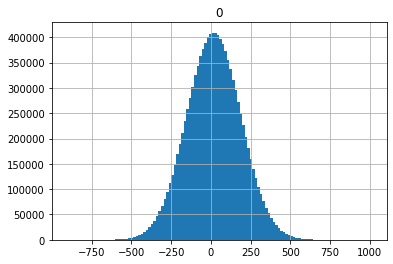

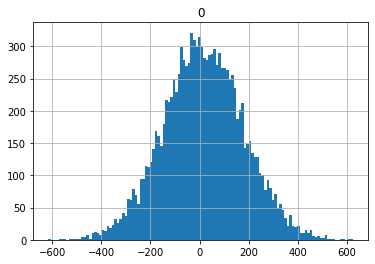

In [10]:
# в данном случае нулевая гипотеза состоит в отсутствии различий (однородности) выборок
# соответственно, при p > 0.001 нулевая гипотеза не отвергается

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
t , p  = stats.ttest_ind(population_men,population_women,equal_var=False)
significance = 0.001
print('Среднее men=%.6f, среднее women=%.6f , t=%.6f, p-value=%.6f, significance=%.3f\n' % (population_men.mean(), population_women.mean(), t, p, significance))

if p < significance:
    print("""При уровне значимости %.3f различие между выборками значительно.""" % (significance))    
else:
    print("""При уровне значимости %.3f различие между выборками незначительно.""" % (significance))
    

pd.DataFrame(population_men).hist(bins=120)
pd.DataFrame(population_women).hist(bins=120)

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [93]:
### Ваш код...
sigma = 150
Za = 1.96
e = 50
print(f'Минимально необходимый объем выборки: {((sigma*Za)/e)**2}')

Минимально необходимый объем выборки: 34.5744


4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [36]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [40]:
oddsratio, pvalue = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.
### Ваш код...

# в данном случае нулевая гипотеза состоит в отсутствии различий в показателях, отклонения случайны
# H1 будет (p<significance), соотв, что различия в предсказании и реальности настолько сильны, что это нельзя списать на белый шум

significance = 0.05
print('oddsratio=%.6f, p-value=%.6f, significance=%.3f\n' % (oddsratio, pvalue, significance))

if pvalue < significance:
    print("""При уровне значимости %.3f получается, что данные не связаны, маг мошенник.""" % (significance))
else:
    print("""При уровне значимости %.3f получается, что маг умееет.""" % (significance))


oddsratio=2.037037, p-value=0.083236, significance=0.050

При уровне значимости 0.050 получается, что маг умееет.


5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [50]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

print(mean_confidence_interval(data, 0.9))
 

(6.074074746111319, 6.628571428571429, 7.183068111031539)


6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [57]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
t, p = stats.ttest_ind(data_1,data_2)
t,p,p<0.001
# выходит, что выборки слишком различаются

(7.35744682757447, 2.1159475572725764e-11, True)

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

In [58]:
# У нас получилась 3% вероятность, что мы ошибемся, если отвергнем нулевую гипотезу
# Дальше зависит от нашего заданного уровня значимости. Если он больше 3%, то принимаем, что распределение всё же не нормальное
# Если меньше, то отбросить нулевую гипотезу мы не можем, принимаем распределение нормальным.

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [87]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test
significance = 0.05
s, p = stats.ttest_ind(a=A,b=B)
print('p-value=',p)
if p > significance:
    print("""При уровне значимости %.3f получается, что различия случайны.""" % (significance))
    print('Различия были бы значимы при p<0.05')    
else:
    print("""При уровне значимости %.3f получается, что эффект есть.""" % (significance))
    
# различия были бы значимы при p<0.05

p-value= 0.740034005650458
При уровне значимости 0.050 получается, что различия случайны.
Различия были бы значимы при p<0.05
